# Two exponentials model

Two-exponentials synapse model describes inhibitory synapses create exponential post-synaptic current with two exponential terms.

In [1]:
import matplotlib.pyplot as plt
import brainpy as bp
import numpy as np
from bpmodels.neurons import get_LIF
import bpmodels

In [2]:
# set params
duration = 100.
dt = 0.02
bp.profile.set(jit=True, dt=dt, merge_steps=True, show_code=False)

Import two-exponentials synapse model from bpmodels package. Build and simulate a simple network composed of two-exponentials synapses and LIF neurons.

In [3]:
# import models
LIF_neuron = get_LIF()
two_exponentials_syn = bpmodels.synapses.get_two_exponentials()

# set pre & post NeuGroup
pre = bp.NeuGroup(LIF_neuron, geometry=(10,), monitors=['V', 'input', 'spike'])
pre.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
pre.ST['V'] = -65.
post = bp.NeuGroup(LIF_neuron, geometry=(10,), monitors=['V', 'input', 'spike'])
post.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
pre.ST['V'] = -65.

# set synapse connection & build network
two_exponentials = bp.SynConn(model=two_exponentials_syn, pre_group=pre, post_group=post,
                          conn=bp.connect.All2All(), monitors=['g'], delay=10.)
two_exponentials.runner.set_schedule(['input', 'update', 'output', 'monitor'])
net = bp.Network(pre, two_exponentials, post)

# create input
current = bp.inputs.spike_current([5., 10., 15., 20.], bp.profile._dt, 1., duration=duration)

# simulate
net.run(duration=duration, inputs=[two_exponentials, 'pre.spike', current, "="], report=False)

Paint g-t plot, post-synaptic current-t plot.

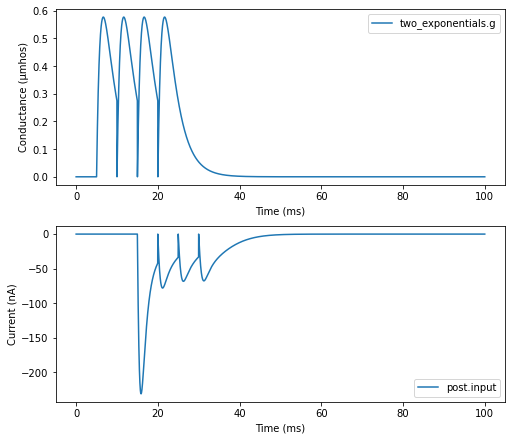

In [4]:
# paint
ts = net.ts
fig, gs = bp.visualize.get_figure(2, 1, 3, 7)

fig.add_subplot(gs[0, 0])
plt.plot(ts, two_exponentials.mon.g[:, 0], label='two_exponentials.g')
plt.ylabel('Conductance (µmhos)')
plt.xlabel('Time (ms)')
plt.legend()

fig.add_subplot(gs[1, 0])
plt.plot(ts, post.mon.input[:, 0], label='post.input')
plt.ylabel('Current (nA)')
plt.xlabel('Time (ms)')
plt.legend()

plt.show()